In [1]:
import os
if os.path.basename(os.getcwd()) == 'notebooks':
    os.chdir('../../../AutexysHost/source')

import numpy as np
from matplotlib import pyplot as plt

In [2]:
%%html

<style>
.p-Widget.p-Panel.jp-OutputArea-child {
    display: inline-block;
}
</style>

## Steven's Lambert Charge Model 1

Adapted from:

[A Lambert-Function Charge-Based Methodology for Extracting Electrical Parameters of Nanoscale FinFETs
](https://ieeexplore-ieee-org.proxy.lib.duke.edu/abstract/document/6343230)

With insight from:

[Compact Model of Drain Current in Short-Channel Triple-Gate FinFETs
](https://ieeexplore-ieee-org.proxy.lib.duke.edu/abstract/document/6202679)


$$I_{d} = {W_{\rm eff} \over \hbox{2}L}\mu_{\rm eff}C_{\rm ox}(\hbox{2}V_{\rm th})^{2}\left(q_{\rm is}^{2} - q_{\rm id}^{2}\right)$$

$$q_{\rm ix} = \hbox{Lambert}\ W \left[e^{{V_{g} - V_{t} - V_{x} \over 2V_{\rm th}}}\right]$$

$$\mu_{\rm eff} = {\mu_{o} \over \hbox{1} + \theta_{1}V_{\rm th}q_{\rm is} + \theta_{2}(V_{\rm th}q_{\rm is})^{2}}$$

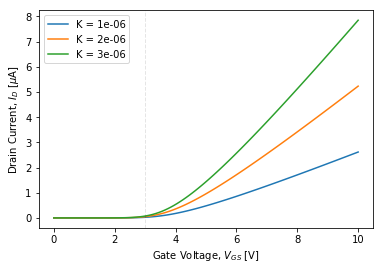

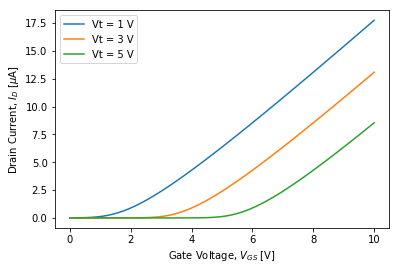

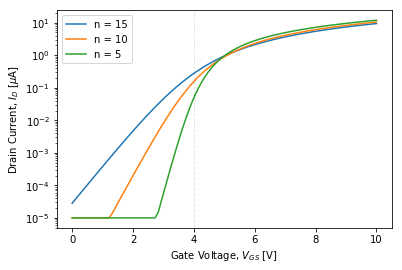

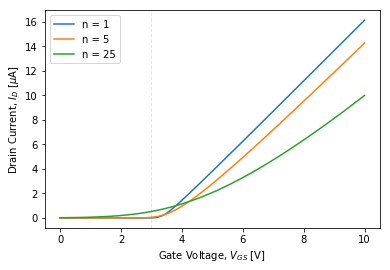

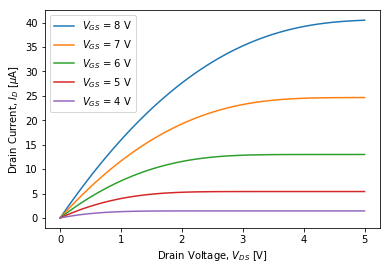

In [283]:
import numpy as np
from scipy.special import lambertw

def stevenSimpleFET1(VGS = np.linspace(0,10,100),
                        VDS = 0.5,
                        Ioff = 1e-11,
                        Vt = 3,
                        SS = 0.5,
                        T = 273.15 + 21,
                        muCoxWoL = 5e-6,
                        n = None,
                        gm_max = None
                    ):
    if isinstance(VGS, list):
        VGS = np.array(VGS)
    if isinstance(VDS, list):
        VDS = np.array(VDS)
    
    kB = 8.617e-5
    q = 1
    Vtherm = kB*T/q
    
    if n is None:
        n = SS/(np.log(10)*Vtherm)
    if gm_max is not None:
        muCoxWoL = gm_max/VDS
    
    qis = lambertw(np.exp((VGS-Vt-0*VDS)/(2*n*Vtherm))).real
    qid = lambertw(np.exp((VGS-Vt-1*VDS)/(2*n*Vtherm))).real
    Id = muCoxWoL/2*(2*n*Vtherm)**2*(qis**2-qid**2)
    Id = np.maximum(Id, Ioff)
    
    return locals()

for muCoxWoL in [1e-6,2e-6,3e-6]:
    fet = stevenSimpleFET1(muCoxWoL=muCoxWoL)
    plt.plot(fet['VGS'], 1e6*fet['Id'], label='K = {}'.format(muCoxWoL))
plt.axvline(x=fet['Vt'], ls='--', c='k', lw=1, alpha=0.1)
plt.legend()
plt.ylabel('Drain Current, $I_D$ [$\mu$A]')
plt.xlabel('Gate Voltage, $V_{GS}$ [V]')
plt.show()

for Vt in [1,3,5]:
    fet = stevenSimpleFET1(Vt=Vt)
    plt.plot(fet['VGS'], 1e6*fet['Id'], label='Vt = {} V'.format(Vt))
plt.legend()
plt.ylabel('Drain Current, $I_D$ [$\mu$A]')
plt.xlabel('Gate Voltage, $V_{GS}$ [V]')
plt.show()

for n in reversed([5,10,15]):
    fet = stevenSimpleFET1(n=n, Vt=4)
    plt.semilogy(fet['VGS'], 1e6*fet['Id'], label='n = {}'.format(n))
plt.axvline(x=fet['Vt'], ls='--', c='k', lw=1, alpha=0.1)
plt.legend()
plt.ylabel('Drain Current, $I_D$ [$\mu$A]')
plt.xlabel('Gate Voltage, $V_{GS}$ [V]')
plt.show()

for n in [1,5,25]:
    fet = stevenSimpleFET1(n=n)
    plt.plot(fet['VGS'], 1e6*fet['Id'], label='n = {}'.format(n))
plt.axvline(x=fet['Vt'], ls='--', c='k', lw=1, alpha=0.1)
plt.legend()
plt.ylabel('Drain Current, $I_D$ [$\mu$A]')
plt.xlabel('Gate Voltage, $V_{GS}$ [V]')
plt.show()

for VGS in range(8,3,-1):
    VDS = np.linspace(0,5,100)
    fet = stevenSimpleFET1(VDS=VDS, VGS=VGS)
    plt.plot(fet['VDS'], 1e6*fet['Id'], label='$V_{{GS}}$ = {} V'.format(VGS))
plt.legend()
plt.ylabel('Drain Current, $I_D$ [$\mu$A]')
plt.xlabel('Drain Voltage, $V_{DS}$ [V]')
plt.show()


In [276]:
for VGS in [0,0.5,1]:
    VDS = 0.5
    xs = np.linspace(0,1,100)
    qis = lambertw(np.exp((VGS-Vt-xs*VDS)/(2*n*Vtherm))).real
    
    plt.plot(xs, qis, label='$V_{{GS}}$ = {}'.format(VGS))
plt.xlabel('Position along Channel Length [%]')
plt.legend()
plt.show()

for VDS in [0,1,2,3]:
    xs = np.linspace(0,1,100)
    qis = lambertw(np.exp((VGS-Vt-xs*VDS)/(2*n*Vtherm))).real
    
    plt.plot(xs, qis, label='$V_{{DS}}$ = {}'.format(VDS))
plt.xlabel('Position along Channel Length [%]')
plt.legend()
plt.show()

VDS = 1

for n in [3,6,9,12]:
    xs = np.linspace(0,1,100)
    qis = lambertw(np.exp((VGS-Vt-xs*VDS)/(2*n*Vtherm))).real
    
    plt.plot(xs, qis, label='n = {}'.format(n))
plt.xlabel('Position along Channel Length [%]')
plt.legend()
plt.show()


NameError: name 'Vtherm' is not defined

## Steven's Lambert Charge Model 2

Adapted from:

[A Lambert-Function Charge-Based Methodology for Extracting Electrical Parameters of Nanoscale FinFETs
](https://ieeexplore-ieee-org.proxy.lib.duke.edu/abstract/document/6343230)

With insight from:

[Compact Model of Drain Current in Short-Channel Triple-Gate FinFETs
](https://ieeexplore-ieee-org.proxy.lib.duke.edu/abstract/document/6202679)


$$I_{d} = {W \over 2 L}\mu_{eff}C_{ox}(2 V_{th})^{2}\left(q_{is}^{2} - q_{id}^{2}\right)$$

$$q_{ix} = Lambert\ W \left[e^{{V_{g} - V_{t} - V_{x} \over 2 V_{th}}}\right]$$

$$\mu_{eff} = {\mu_{0} \over 1 + \theta_{1}V_{th}q_{is} + \theta_{2}(V_{th}q_{is})^{2}}$$

$$g_{m} = {\mu_{0} C_{ox} {W \over L} V_{d}q_{is}\left[\hbox{1} - \theta_{2}(V_{th}q_{is})^{2}\right] \over (\hbox{1} + q_{is})\left[\hbox{1} + \left(\theta_{1}V_{th}q_{is} + \theta_{2}(V_{th}q_{is})^{2}\right)\right]^{2}}$$

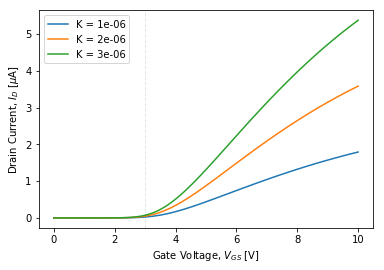

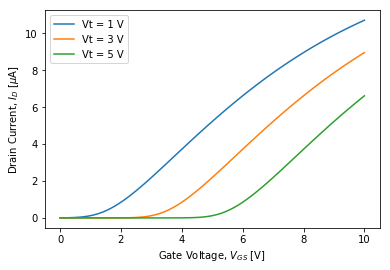

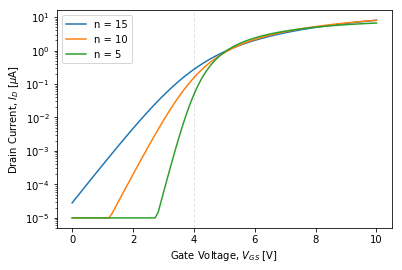

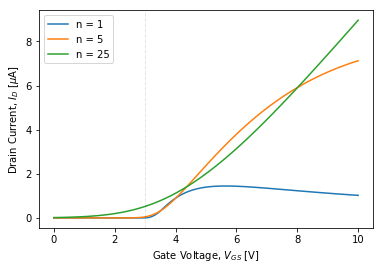

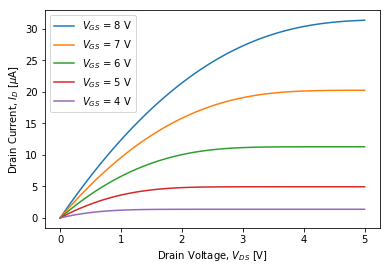

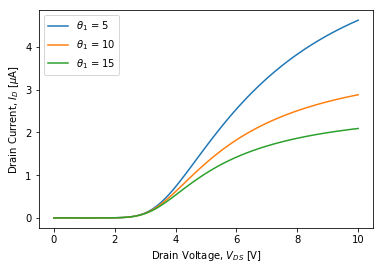

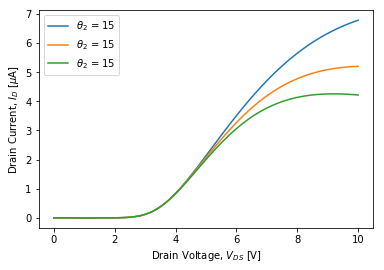

In [284]:
import numpy as np
from scipy.special import lambertw

def stevenSimpleFET2(VGS = np.linspace(0,10,100),
                        VDS = 0.5,
                        Ioff = 1e-11,
                        Vt = 3,
                        SS = 0.5,
                        T = 273.15 + 21,
                        muCoxWoL = 5e-6,
                        theta1 = 1,
                        theta2 = 1,
                        n = None,
                        gm_max = None
                    ):
    if isinstance(VGS, list):
        VGS = np.array(VGS)
    if isinstance(VDS, list):
        VDS = np.array(VDS)
    
    kB = 8.617e-5
    q = 1
    Vtherm = kB*T/q
    
    if n is None:
        n = SS/(np.log(10)*Vtherm)
    if gm_max is not None:
        muCoxWoL = gm_max/VDS
    
    qis = lambertw(np.exp((VGS-Vt-0*VDS)/(2*n*Vtherm))).real
    qid = lambertw(np.exp((VGS-Vt-1*VDS)/(2*n*Vtherm))).real
    muCoxWoL /= 1 + theta1*Vtherm*qis + theta2*(Vtherm*qis)**2
    Id = muCoxWoL/2*(2*n*Vtherm)**2*(qis**2-qid**2)
    Id = np.maximum(Id, Ioff)
    
    return locals()

for muCoxWoL in [1e-6,2e-6,3e-6]:
    fet = stevenSimpleFET2(muCoxWoL=muCoxWoL)
    plt.plot(fet['VGS'], 1e6*fet['Id'], label='K = {}'.format(muCoxWoL))
plt.axvline(x=fet['Vt'], ls='--', c='k', lw=1, alpha=0.1)
plt.legend()
plt.ylabel('Drain Current, $I_D$ [$\mu$A]')
plt.xlabel('Gate Voltage, $V_{GS}$ [V]')
plt.show()

for Vt in [1,3,5]:
    fet = stevenSimpleFET2(Vt=Vt)
    plt.plot(fet['VGS'], 1e6*fet['Id'], label='Vt = {} V'.format(Vt))
plt.legend()
plt.ylabel('Drain Current, $I_D$ [$\mu$A]')
plt.xlabel('Gate Voltage, $V_{GS}$ [V]')
plt.show()

for n in reversed([5,10,15]):
    fet = stevenSimpleFET2(n=n, Vt=4)
    plt.semilogy(fet['VGS'], 1e6*fet['Id'], label='n = {}'.format(n))
plt.axvline(x=fet['Vt'], ls='--', c='k', lw=1, alpha=0.1)
plt.legend()
plt.ylabel('Drain Current, $I_D$ [$\mu$A]')
plt.xlabel('Gate Voltage, $V_{GS}$ [V]')
plt.show()

for n in [1,5,25]:
    fet = stevenSimpleFET2(n=n)
    plt.plot(fet['VGS'], 1e6*fet['Id'], label='n = {}'.format(n))
plt.axvline(x=fet['Vt'], ls='--', c='k', lw=1, alpha=0.1)
plt.legend()
plt.ylabel('Drain Current, $I_D$ [$\mu$A]')
plt.xlabel('Gate Voltage, $V_{GS}$ [V]')
plt.show()

for VGS in range(8,3,-1):
    VDS = np.linspace(0,5,100)
    fet = stevenSimpleFET2(VDS=VDS, VGS=VGS)
    plt.plot(fet['VDS'], 1e6*fet['Id'], label='$V_{{GS}}$ = {} V'.format(VGS))
plt.legend()
plt.ylabel('Drain Current, $I_D$ [$\mu$A]')
plt.xlabel('Drain Voltage, $V_{DS}$ [V]')
plt.show()

for theta1 in [5,10,15]:
    fet = stevenSimpleFET2(theta1=theta1)
    plt.plot(fet['VGS'], 1e6*fet['Id'], label='$\\theta_1$ = {}'.format(theta1))
plt.legend()
plt.ylabel('Drain Current, $I_D$ [$\mu$A]')
plt.xlabel('Drain Voltage, $V_{DS}$ [V]')
plt.show()

for theta2 in [5,10,15]:
    fet = stevenSimpleFET2(theta2=theta2)
    plt.plot(fet['VGS'], 1e6*fet['Id'], label='$\\theta_2$ = {}'.format(theta1))
plt.legend()
plt.ylabel('Drain Current, $I_D$ [$\mu$A]')
plt.xlabel('Drain Voltage, $V_{DS}$ [V]')
plt.show()

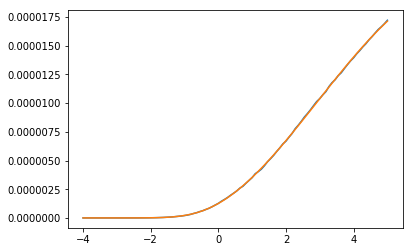

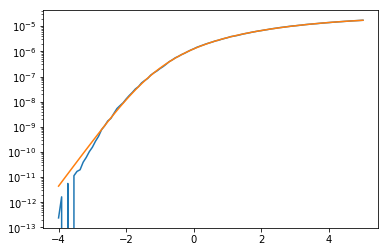

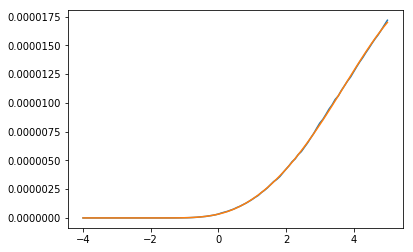

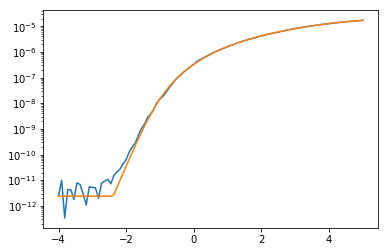

[[Model]]
    Model(stevenSimpleFET2FitInterface)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 417
    # data points      = 100
    # variables        = 7
    chi-square         = 2.1311e-08
    reduced chi-square = 2.2915e-10
    Akaike info crit   = -2212.92280
    Bayesian info crit = -2194.68660
[[Variables]]
    VDS:       1.28688431 (init = 0.5)
    Ioff:      2.4342e-12 (init = 2.4e-13)
    Vt:       -1.31163572 (init = 0)
    SS:        0.55619361 (init = 0.3)
    muCoxWoL:  2.6045e-06 (init = 5e-06)
    theta1:   -2.32044631 (init = 1)
    theta2:    5.98646852 (init = 1)

[[Model]]
    Model(stevenSimpleFET2FitInterface)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 1071
    # data points      = 100
    # variables        = 7
    chi-square         = 2.9457e-08
    reduced chi-square = 3.1674e-10
    Akaike info crit   = -2180.54979
    Bayesian info crit = -2162.31360
[[Variables]]
    VDS:       1.71242571 +/- 0

In [309]:
from utilities import DataLoggerUtility as dlu

data = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/K/20-27', 'GateSweep.json', minIndex=0, maxIndex=float('inf'), minExperiment=5, maxExperiment=5, minRelativeIndex=0, maxRelativeIndex=float('inf'))

VGSf = data[0]['Results']['vgs_data'][0]
VGSr = data[0]['Results']['vgs_data'][1]
Idf = data[0]['Results']['id_data'][0]
Idr = data[0]['Results']['id_data'][1]

import lmfit

def stevenSimpleFET1FitInterface(VGS,VDS,Ioff,Vt,SS,muCoxWoL):
    return stevenSimpleFET2(VGS=VGS,VDS=VDS,Ioff=Ioff,Vt=Vt,SS=SS,
                            muCoxWoL=muCoxWoL)['Id']

def fitStevenSimpleFET1(VGS, Id, VDS=None):
    model = lmfit.Model(stevenSimpleFET1FitInterface, nan_policy='propagate')
    params = model.make_params()
    
    params['VDS'].value = 0.5
    if VDS is not None:
        params['VDS'].value = VDS
        params['VDS'].vary = False
    params['Ioff'].value = np.min(np.abs(Id))
    # params['Ioff'].min = 0.5*np.min(np.abs(Id))*0
    # params['Ioff'].vary = False
    params['Vt'].value = 0
    params['SS'].value = 0.3
    params['muCoxWoL'].value = 5e-6
    
    fit = model.fit(np.abs(Id), params, VGS=VGS, weights=np.sqrt(1/np.abs(Id)))
    result = stevenSimpleFET1(VGS=VGS, **fit.best_values)
    result['fit'] = fit
    return result

def stevenSimpleFET2FitInterface(VGS,VDS,Ioff,Vt,SS,muCoxWoL,theta1,theta2):
    return stevenSimpleFET2(VGS=VGS,VDS=VDS,Ioff=Ioff,Vt=Vt,SS=SS,
                            muCoxWoL=muCoxWoL,theta1=theta1,theta2=theta2)['Id']

def fitStevenSimpleFET2(VGS, Id, VDS=None):
    model = lmfit.Model(stevenSimpleFET2FitInterface, nan_policy='propagate')
    params = model.make_params()
    
    params['VDS'].value = 0.5
    if VDS is not None:
        params['VDS'].value = VDS
        params['VDS'].vary = False
    params['Ioff'].value = np.min(np.abs(Id))
    # params['Ioff'].min = 0.5*np.min(np.abs(Id))*0
    # params['Ioff'].vary = False
    params['Vt'].value = 0
    params['SS'].value = 0.3
    params['muCoxWoL'].value = 5e-6
    params['theta1'].value = 1
    params['theta2'].value = 1 
    
    fit = model.fit(np.abs(Id), params, VGS=VGS, weights=np.sqrt(1/np.abs(Id)))
    result = stevenSimpleFET2(VGS=VGS, **fit.best_values)
    result['fit'] = fit
    return result

fitf = fitStevenSimpleFET2(VGSf, Idf)

plt.plot(VGSf, np.abs(Idf))
plt.plot(VGSf, fitf['fit'].best_fit)
# plt.plot(VGSf, np.array(VGSf)*fitf.best_values['muCoxWoL'])
# plt.plot(VGSf, fitf.init_fit)
plt.show()

plt.semilogy(VGSf, Idf)
plt.semilogy(VGSf, fitf['fit'].best_fit)
# plt.semilogy(VGSf, fitf.init_fit)
plt.show()

# fitr = model.fit(np.abs(Idr), params, VGS=VGSr, weights=np.sqrt(1/np.abs(Idr)))
fitr = fitStevenSimpleFET2(VGSr, Idr)

plt.plot(VGSr, Idr)
plt.plot(VGSr, fitr['fit'].best_fit)
# plt.plot(VGSr, np.array(VGSr)*fitr.best_values['muCoxWoL'])
# plt.plot(VGSr, fitr.init_fit)
plt.show()

plt.semilogy(VGSr, np.abs(Idr))
plt.semilogy(VGSr, fitr['fit'].best_fit)
# plt.semilogy(VGSr, fitr.init_fit)
plt.show()

print(fitf['fit'].fit_report())
print(fitr['fit'].fit_report())

In [310]:
import pandas as pd

jdatId = pd.read_excel(r'../../AutexysData/joey/CNT_TFT/190402/K/190401S2_ChipK.xlsx', sheet_name='DrainCurrent')
jdatIg = pd.read_excel(r'../../AutexysData/joey/CNT_TFT/190402/K/190401S2_ChipK.xlsx', sheet_name='GateCurrent')

jdatVGSf = jdatId['V2'].values[0:jdatId['V2'].size//2]
jdatVGSr = jdatId['V2'].values[jdatId['V2'].size//2:]
jdatIDsf = [jdatId[i].values[0:jdatId[i].size//2] for i in range(1,89+1)]
jdatIDsr = [jdatId[i].values[jdatId[i].size//2:] for i in range(1,89+1)]

sectionfs = [np.argwhere(np.gradient(Id) < -0.5*np.median(np.gradient(Id))) for Id in jdatIDsf]

fitfs = [fitStevenSimpleFET1(jdatVGSf[np.gradient(Id) > 0], Id[np.gradient(Id) > 0], VDS=0.5) for Id in jdatIDsf]


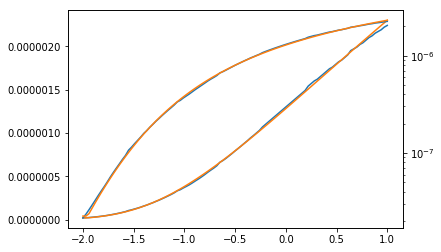

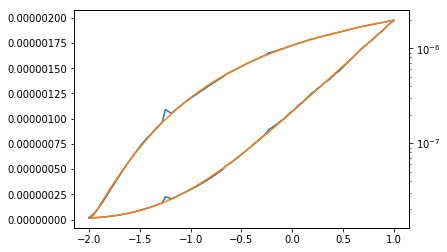

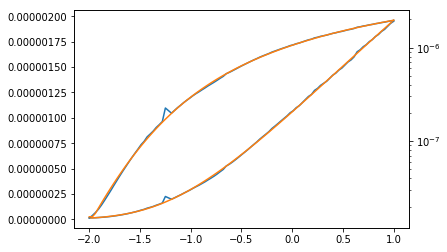

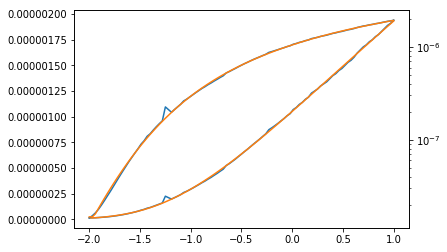

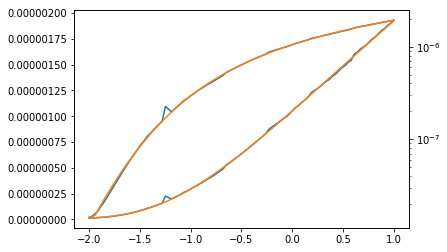

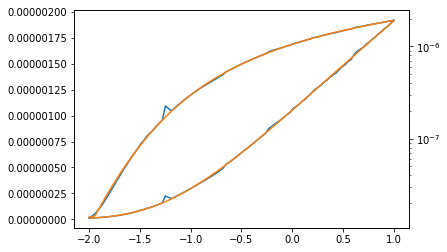

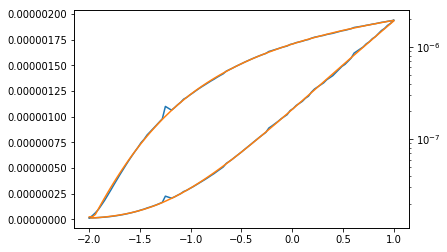

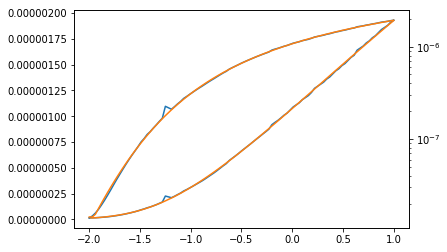

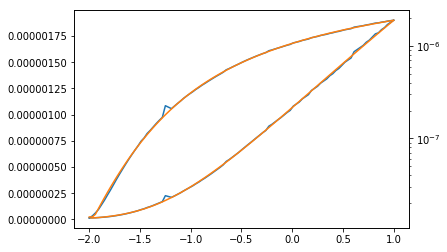

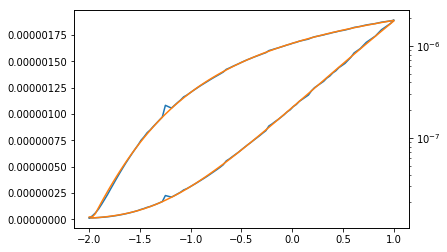

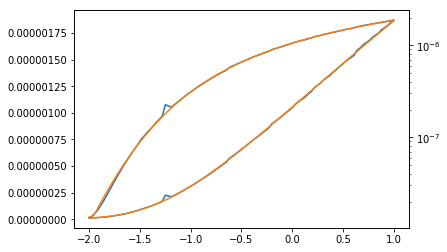

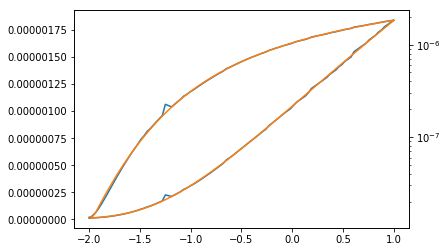

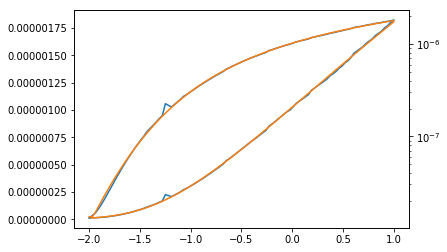

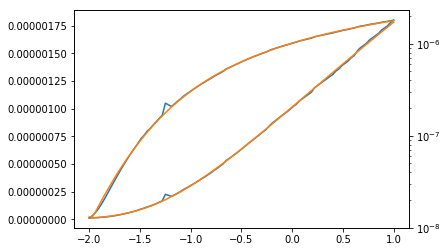

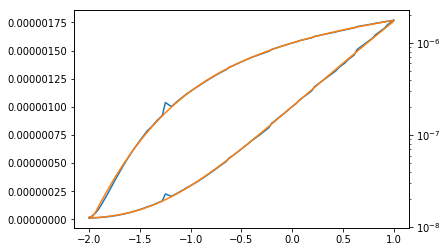

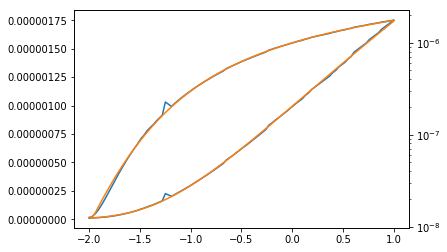

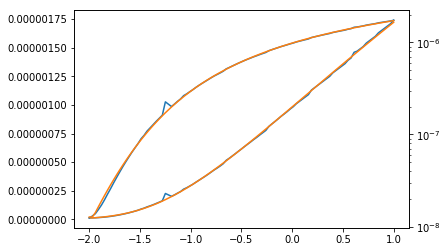

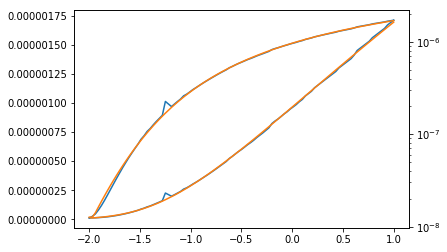

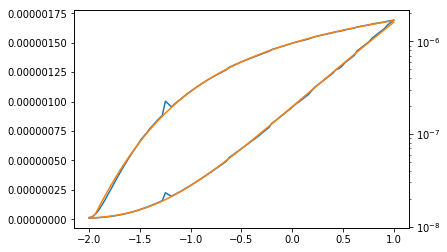

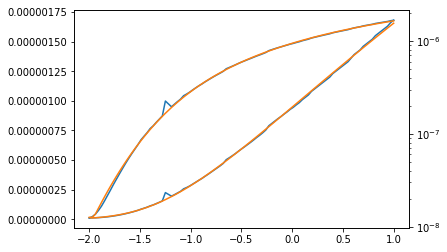

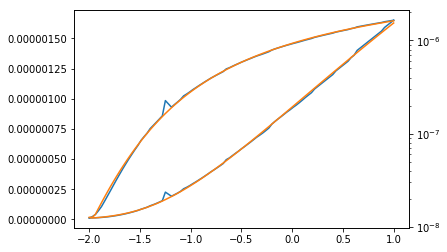

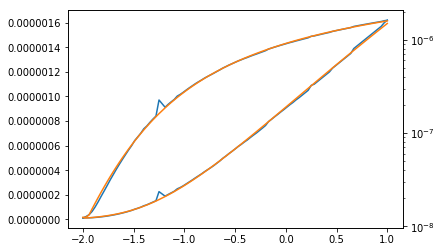

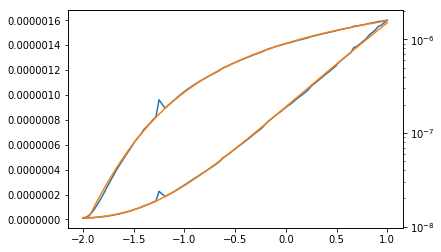

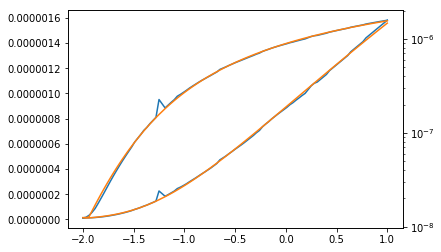

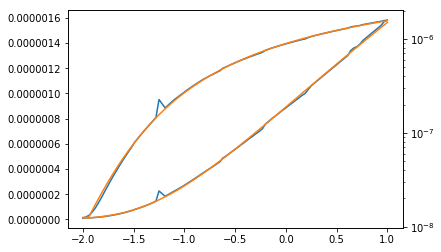

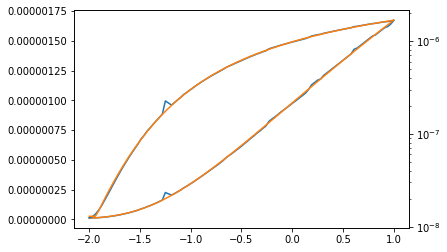

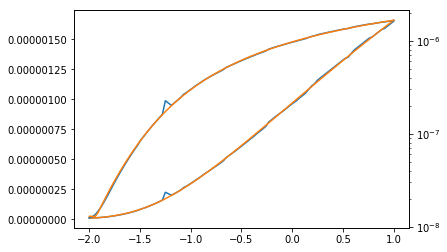

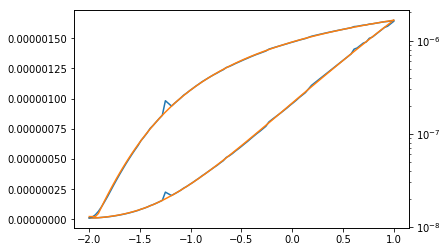

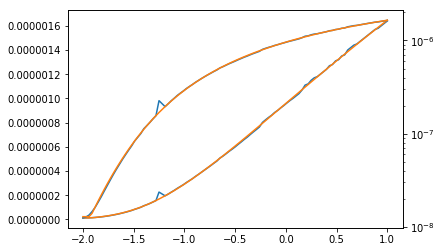

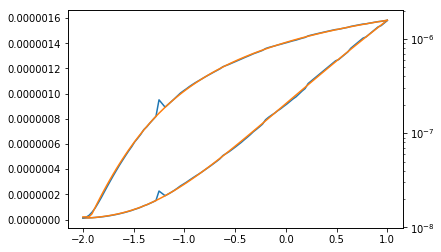

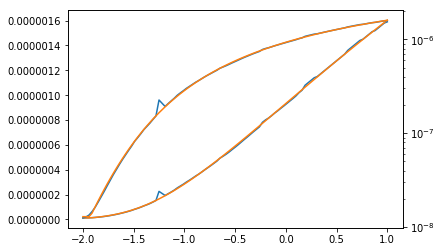

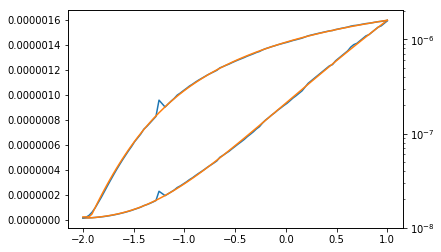

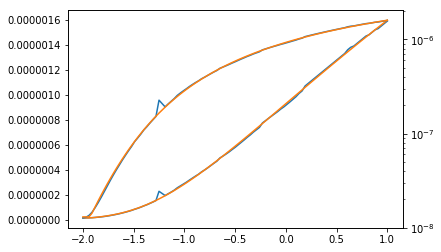

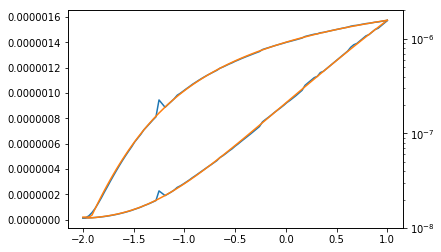

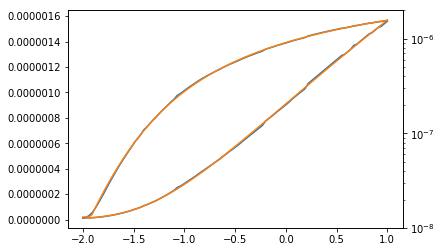

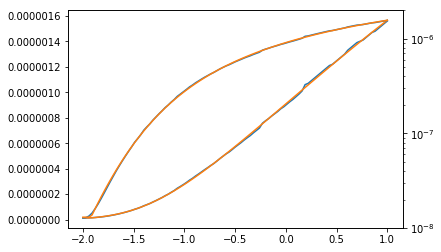

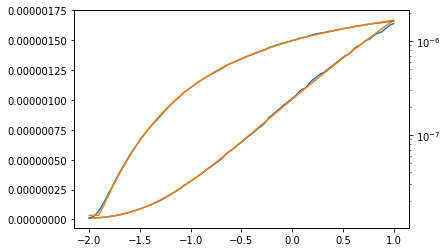

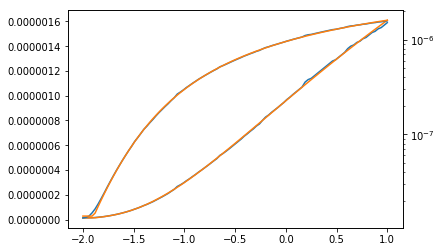

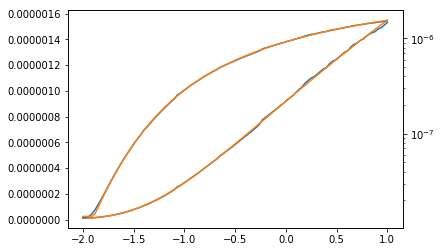

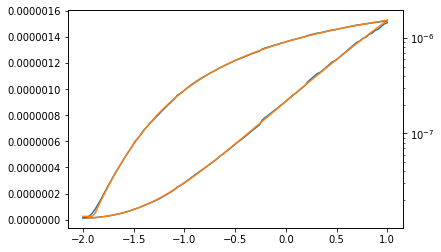

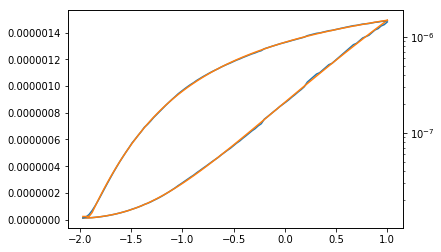

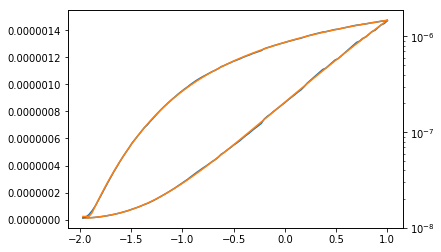

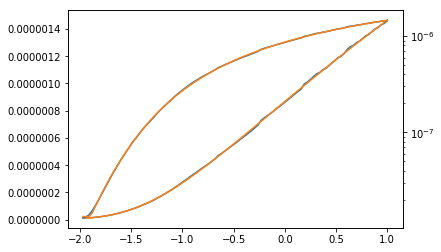

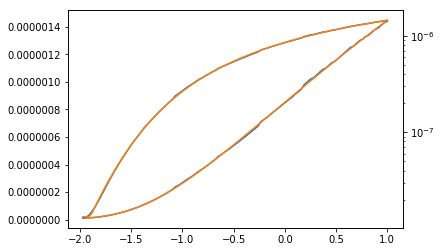

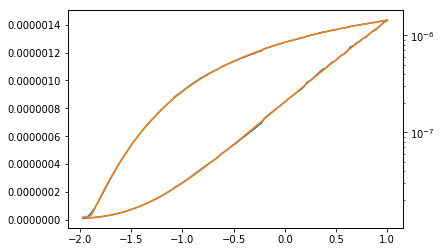

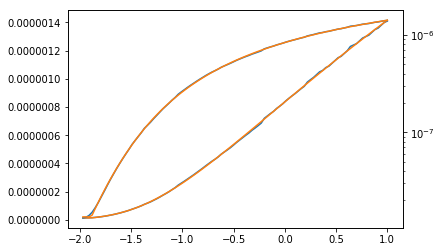

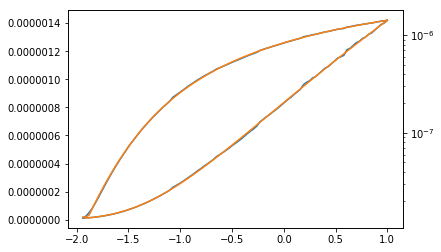

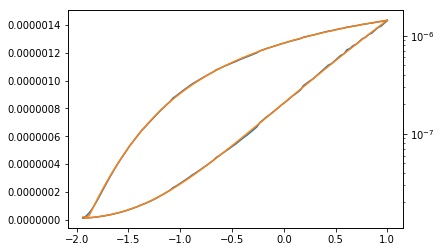

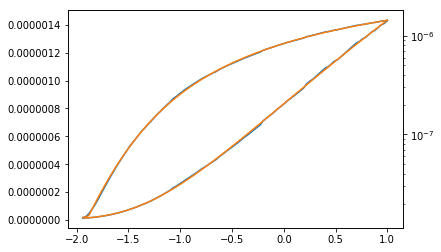

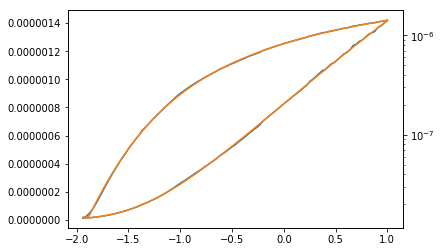

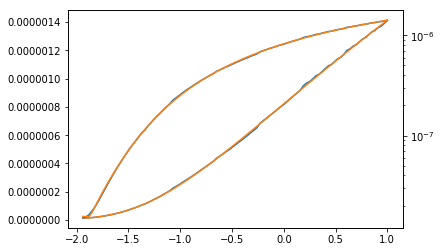

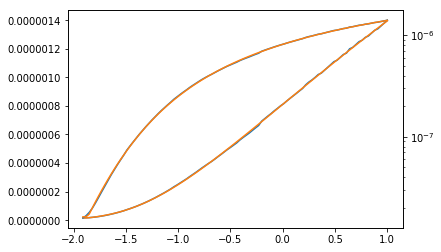

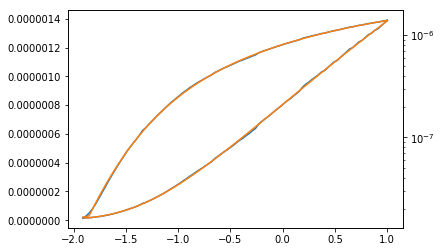

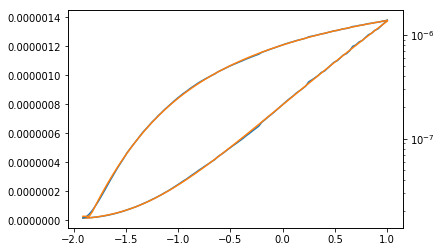

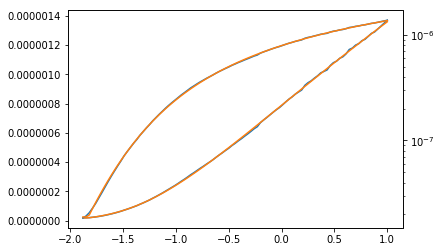

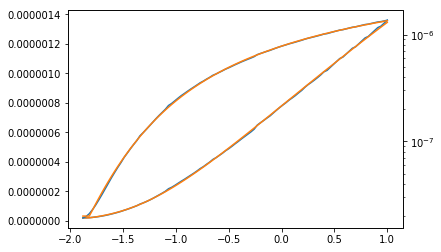

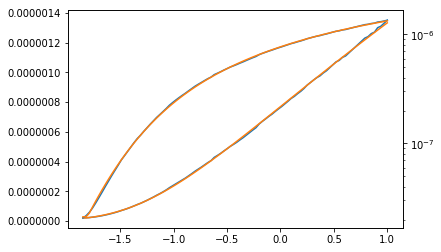

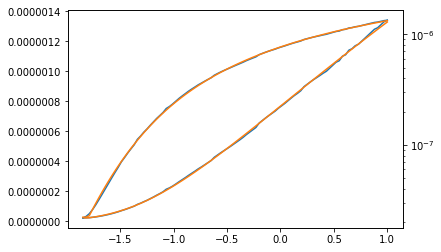

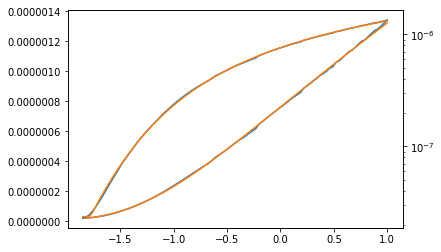

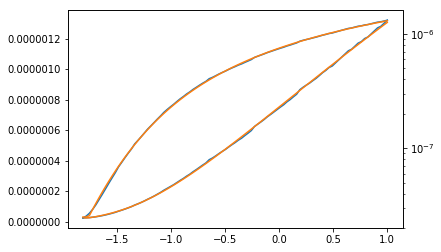

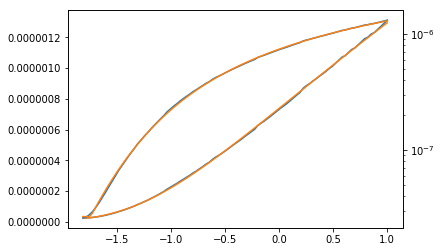

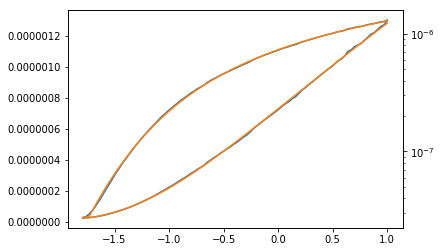

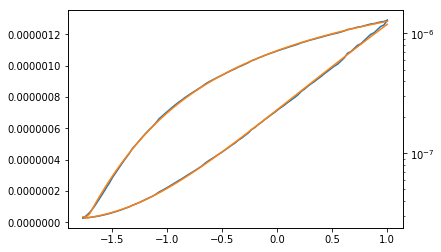

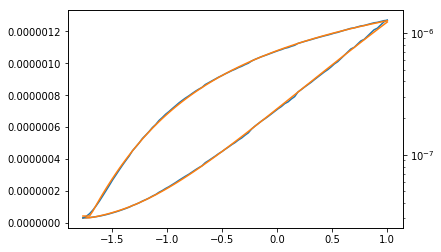

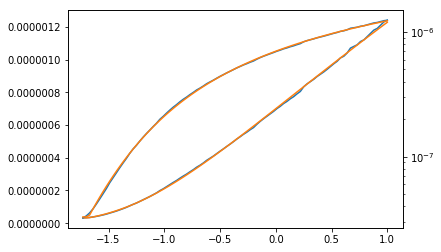

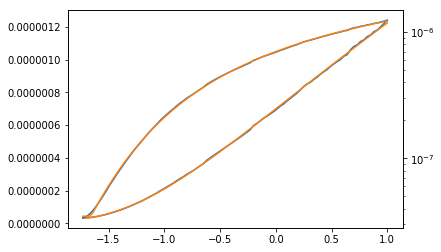

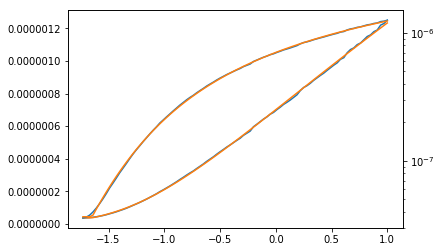

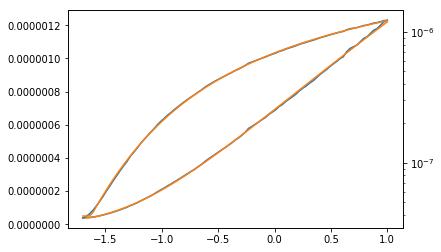

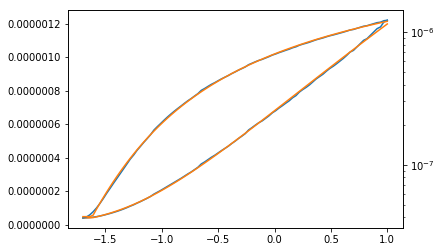

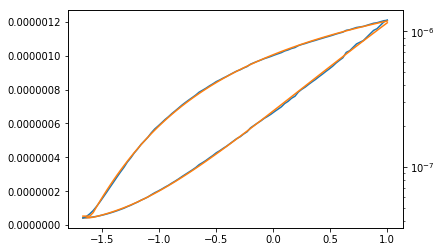

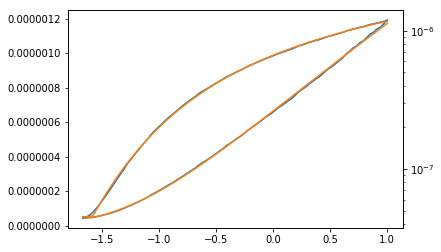

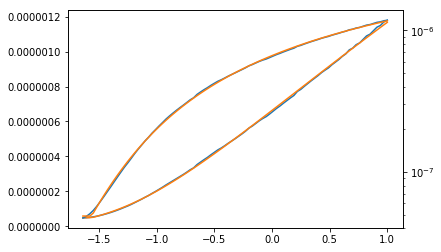

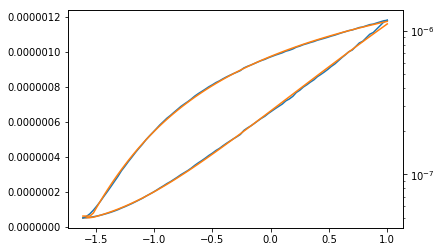

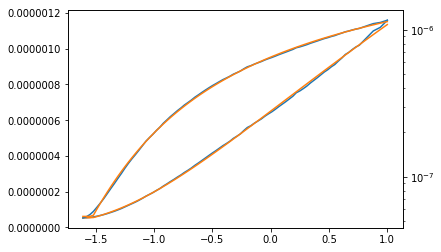

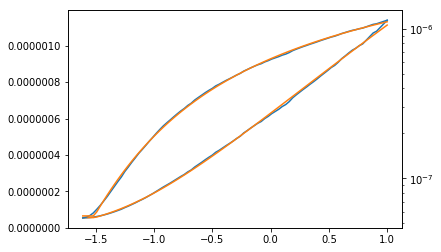

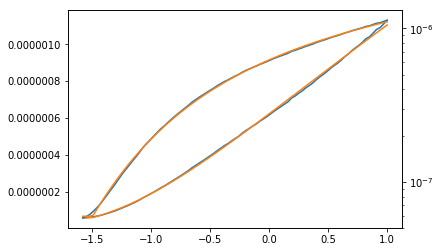

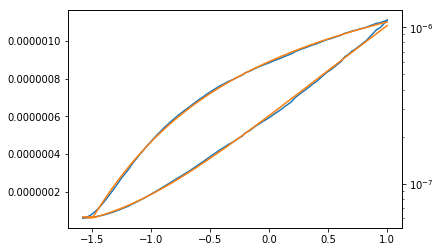

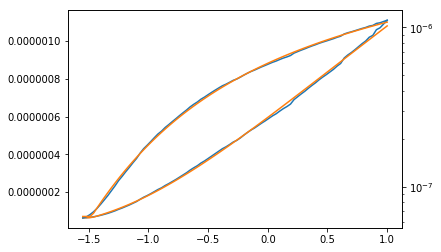

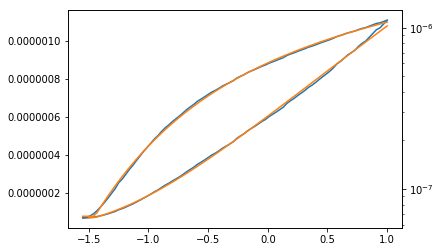

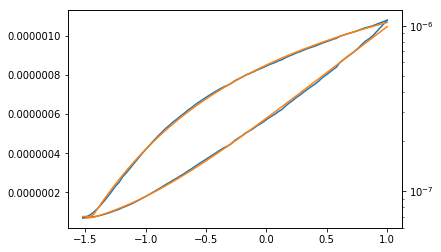

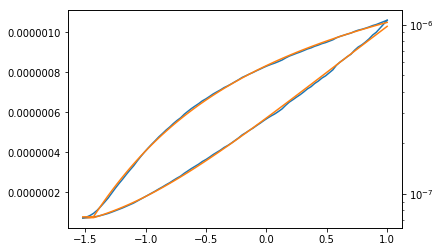

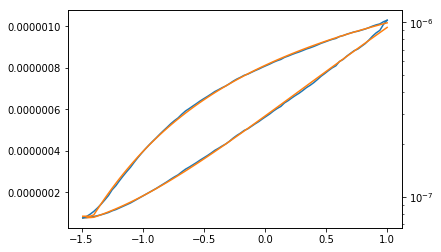

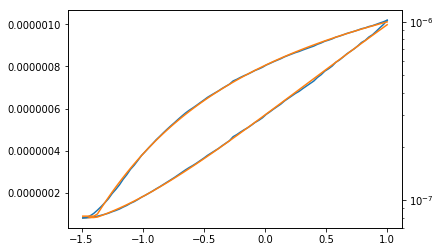

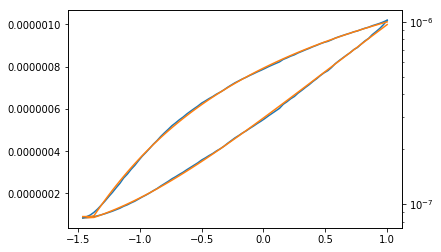

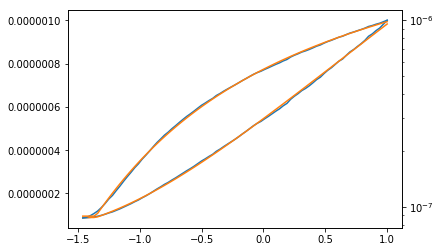

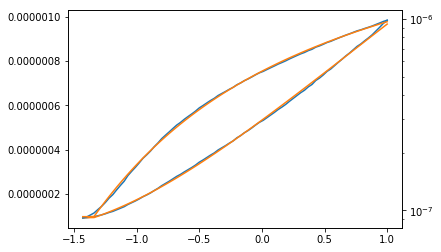

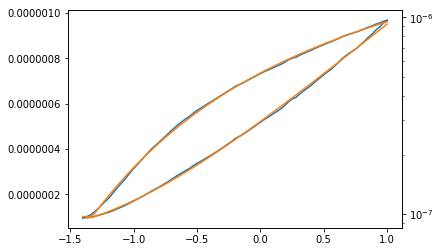

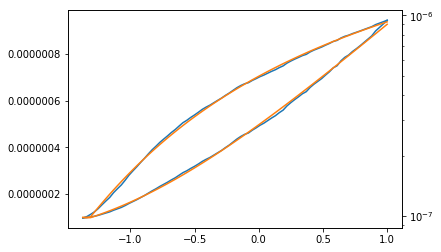

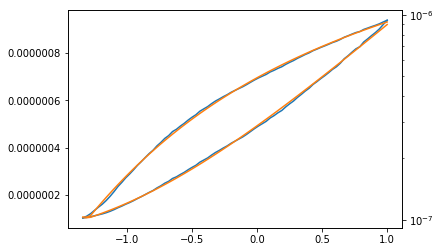

In [311]:
for fit in fitfs:
    plt.plot(fit['VGS'], fit['fit'].data)
    plt.plot(fit['VGS'], fit['fit'].best_fit)
    plt.twinx()
    plt.semilogy(fit['VGS'], fit['fit'].data)
    plt.semilogy(fit['VGS'], fit['fit'].best_fit)

    plt.show()

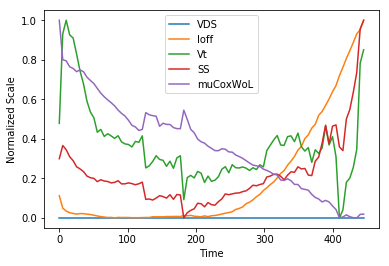

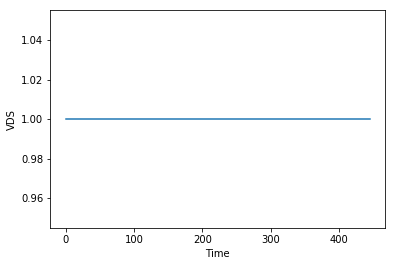

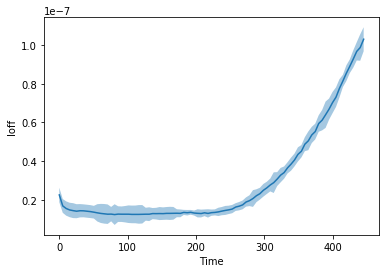

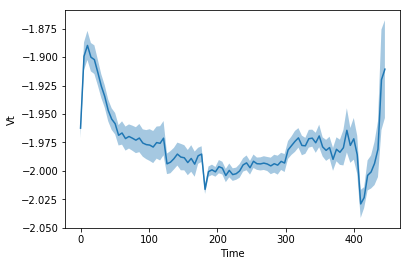

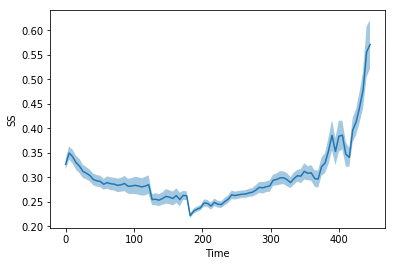

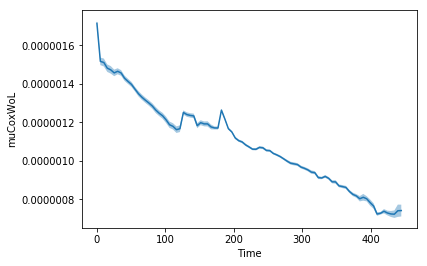

In [305]:
times = np.linspace(0,5*len(fitfs),len(fitfs))

pHists = {}

for pName in fitfs[0]['fit'].best_values.keys():
    pHists[pName] = {
        'values': np.array([fit['fit'].best_values[pName] for fit in fitfs]),
        'errors': np.array([fit['fit'].params[pName].stderr for fit in fitfs])
    }

def normalize(data):
    data = np.array(data)
    data -= np.min(data)
    maximum = np.max(data)
    if maximum != 0:
        data /= np.max(data)
    return data

for pName, pHist in pHists.items():
    plt.plot(times, normalize(pHist['values']), label=pName)
    plt.xlabel('Time')
    plt.ylabel('Normalized Scale')
plt.legend()
plt.show()

for pName, pHist in pHists.items():
    plt.fill_between(times, pHist['values']-3*pHist['errors'], pHist['values']+3*pHist['errors'], alpha=0.4)
    plt.plot(times, pHist['values'])
    plt.xlabel('Time')
    plt.ylabel(pName)
    plt.show()


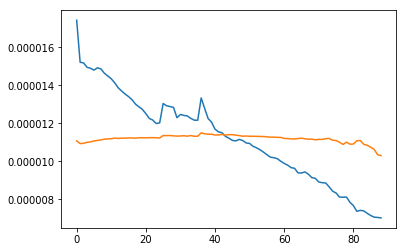

In [324]:
meanmuCoxWoL = np.mean(pHists['muCoxWoL']['values'])

mmParams = []

params = [{key: val['values'][i] for key, val in pHists.items()} for i in range(len(pHists['VDS']['values']))]
mmParams = [{key: val['values'][i] for key, val in pHists.items()} for i in range(len(pHists['VDS']['values']))]
for i in range(len(mmParams)):
    mmParams[i]['muCoxWoL'] = meanmuCoxWoL

models = [stevenSimpleFET1(**p) for p in params]
mmModels = [stevenSimpleFET1(**p) for p in mmParams]

mmIOns = [m['Id'][-1] for m in mmModels]
IOns = [m['Id'][-1] for m in models]

plt.plot(IOns)
plt.plot(mmIOns)
plt.show()